<div class="title">CHIPA PCA MODELS NO CATEGORICALS</div>
<div class="subtitle">Machine Learning</div>


---

<div style="font-size: large; font-weight: bold; margin-left: 6em;">
    <p>Names: <u>Juan Ignacio Álvarez</u>

</div>

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [11]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.compat import lzip
from scipy import stats
from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, lars_path, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from Utils import plot_dataset
from Utils import fit_polylinear_regression, pred_polylinear_regression, plot_polylinear_model
from Utils import plot_contour_lp, plot_contour_l1_l2, plot_contour_linear_lp
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from Utils import plot_dataset_clas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
matplotlib.rc('figure', figsize=(15, 5))
seed = 123

In [2]:
def evaluate_model(model, X_tr, y_tr, X_te, y_te, print_table=True):
    y_tr_p = model.predict(X_tr)
    y_te_p = model.predict(X_te)

    er_tr = [accuracy_score(y_tr, y_tr_p), balanced_accuracy_score(y_tr, y_tr_p)]
    er_te = [accuracy_score(y_te, y_te_p), balanced_accuracy_score(y_te, y_te_p)]

    ers = [er_tr, er_te]
    headers=["Acc", "Bal. Acc"]

    if print_table:
        print("%10s" % "", end="")
        for h in headers:
            print("%10s" % h, end="")
        print("")

        headersc = ["Train", "Test"]

        cnt = 0
        for er in ers:
            hc = headersc[cnt]
            cnt = cnt + 1
            print("%10s" % hc, end="")

            for e in er:
                print("%10.2f" % e, end="")
            print("")

    return ers

def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

## Load of the Dataset

In [1]:
import pandas as pd
df_1 = pd.read_json('prueba_v7_1_json_for_pandas.json')
df_1 = df_1[df_1['FILTER_2']==1]

,variantInternalId,SIFT_DESC,SIFT_SCORE,POLYPHEN_DESC,POLYPHEN_SCORE,MEAN_VAF,STDEV_VAF,MAX_VAF,FRACTION_SAMPLES,NUM_SAMPLES_WITH_MUTATION,...,phyloP30way_mammalian_rankscore,ref,refcodon,"rs_dbSNP""",FILTER_1,FILTER_2,RPA,RU,STR,STRQ
140,chr1_1793267_T_A,deleterious,0.04,possibly_damaging,0.913,0.004285,0.001456,0.005965,0.002314,10,...,0.64695,T,ACC,NaN,1,1,NaN,NaN,NaN,NaN
187,chr1_1815775_G_A,deleterious,0.01,probably_damaging,0.974,0.003864,NA,0.003864,0.002314,10,...,0.53824,G,CAC,NaN,1,1,NaN,NaN,NaN,NaN
189,chr1_1815775_G_C,tolerated,0.51,probably_damaging,0.976,0.008626,0.006228,0.017000,0.002314,10,...,0.53824,G,CAC,NaN,1,1,NaN,NaN,NaN,NaN
199,chr1_1815792_G_C,tolerated,0.45,benign,0.001,0.007688,NA,0.007688,0.020366,88,...,0.53824,G,GCC,NaN,1,1,NaN,NaN,NaN,NaN
1816,chr1_2562865_G_A,tolerated,0.25,probably_damaging,0.999,0.500000,0.009899,0.507000,0.000463,2,...,0.15642,G,GGT,NaN,1,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97417,chrY_20582682_TTG_AAA,deleterious,0,probably_damaging,0.995,0.032108,0.019033,0.285000,0.093265,403,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
97418,chrY_20582682_T_A,tolerated,0.77,possibly_damaging,0.944,0.023000,0.005657,0.027000,0.093265,403,...,0.06483,T,TTG,rs769611401,1,1,NaN,NaN,NaN,NaN
97419,chrY_20582682_TT_AA,deleterious,0,probably_damaging,0.995,0.042000,NA,0.042000,0.093265,403,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
97467,chrY_20592364_TACATGACAAG_T,,,,,0.014341,0.063427,0.500000,0.022911,99,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN


In [41]:
columns = [item.replace('+', 'plus') for item in df_1.columns.values]
columns = [item.replace('-', '_') for item in df_1.columns.values]
df_1.columns = columns

In [42]:


#df_1['INTERNALLY_IDENTIFIED'] = df_1['INTERNALLY_IDENTIFIED'].fillna('False')
df_1 = df_1[df_1['ref'] != '']
df_1 = df_1[df_1['ref'].notnull()]
"""df = df_1.loc[:,['SIFT_DESC', 'Consequence', 'IMPACT', 'TSL', 'Aloft_Confidence',
       'Aloft_Fraction_transcripts_affected', 'BayesDel_addAF_pred',
       'BayesDel_noAF_pred', 'ClinPred_pred', 'DEOGEN2_pred',
       'FATHMM_pred', 'LRT_pred', 'MetaLR_pred', 'MetaRNN_pred',
       'MetaSVM_pred', 'MutationTaster_model', 'MutationTaster_pred',
       'Polyphen2_HVAR_pred', 'PrimateAI_pred', 'SIFT4G_pred',
       'SIFT_pred', 'fathmm-MKL_coding_pred', 'fathmm-XF_coding_pred',
       'SIFT_SCORE', 'POLYPHEN_SCORE', 'FRACTION_SAMPLES',
       'NUM_SAMPLES_WITH_MUTATION', 'WHITELIST', 'ECNT', 'DP',
       'CADD_PHRED', 'CADD_RAW', 'BayesDel_addAF_rankscore',
       'BayesDel_addAF_score', 'BayesDel_noAF_rankscore',
       'BayesDel_noAF_score', 'CADD_phred', 'CADD_raw',
       'CADD_raw_rankscore', 'ClinPred_rankscore', 'ClinPred_score',
       'DANN_rankscore', 'DANN_score', 'DEOGEN2_rankscore',
       'DEOGEN2_score', 'Eigen-PC-phred_coding', 'Eigen-PC-raw_coding',
       'Eigen-PC-raw_coding_rankscore', 'Eigen-phred_coding',
       'Eigen-raw_coding', 'Eigen-raw_coding_rankscore',
       'FATHMM_converted_rankscore', 'FATHMM_score', 'GERP++_NR',
       'GERP++_RS', 'GERP++_RS_rankscore', 'GM12878_fitCons_rankscore',
       'GM12878_fitCons_score', 'GenoCanyon_rankscore',
       'HUVEC_fitCons_rankscore', 'HUVEC_fitCons_score',
       'LIST-S2_rankscore', 'LRT_converted_rankscore', 'M-CAP_rankscore',
       'M-CAP_score', 'MPC_rankscore', 'MPC_score', 'MVP_rankscore',
       'MVP_score', 'MetaLR_rankscore', 'MetaLR_score',
       'MetaRNN_rankscore', 'MetaRNN_score', 'MetaSVM_rankscore',
       'MetaSVM_score', 'MutPred_rankscore', 'MutPred_score',
       'MutationAssessor_rankscore', 'MutationAssessor_score',
       'MutationTaster_converted_rankscore', 'MutationTaster_score',
       'PROVEAN_converted_rankscore', 'PROVEAN_score',
       'Polyphen2_HDIV_rankscore', 'Polyphen2_HDIV_score',
       'Polyphen2_HVAR_rankscore', 'Polyphen2_HVAR_score',
       'PrimateAI_rankscore', 'PrimateAI_score', 'REVEL_rankscore',
       'REVEL_score', 'SIFT4G_converted_rankscore', 'SIFT4G_score',
       'SIFT_converted_rankscore', 'SIFT_score', 'SiPhy_29way_logOdds',
       'SiPhy_29way_logOdds_rankscore', 'VEST4_rankscore', 'VEST4_score',
       'fathmm-MKL_coding_rankscore', 'fathmm-MKL_coding_score',
       'integrated_fitCons_rankscore', 'phastCons100way_vertebrate',
       'phastCons100way_vertebrate_rankscore', 'phastCons17way_primate',
       'phastCons17way_primate_rankscore', 'phastCons30way_mammalian',
       'phastCons30way_mammalian_rankscore', 'phyloP100way_vertebrate',
       'phyloP100way_vertebrate_rankscore', 'INTERNALLY_IDENTIFIED', 'PREVIOUSLY_IDENTIFIED', 'ARTIFACTS', 'variantInternalId', 'LONGITUDINAL_BOTH']]
"""
df = df_1.loc[:,['LoFtool', 'MEAN_VAF', 'MAX_VAF', 'Reliability_index', 'Gene',
       'M_CAP_rankscore', 'PROVEAN_converted_rankscore', 'LIST_S2_score',
       'MetaLR_score', 'POPAF', 'MetaSVM_score', 'Polyphen2_HVAR_rankscore',
       'BayesDel_noAF_rankscore', 'Polyphen2_HDIV_rankscore',
       'MetaSVM_rankscore', 'COSMIC_N_MATCH', 'CADD_raw_rankscore',
       'MetaRNN_rankscore', 'MPOS', 'STRANDQ', 'GM12878_confidence_value',
       'DANN_score', 'SIFT_converted_rankscore', 'STRAND',
       'phyloP30way_mammalian_rankscore', 'BayesDel_noAF_score',
       'FATHMM_score', 'ECNT', 'MPC_score', 'BayesDel_addAF_rankscore',
       'MetaRNN_score', 'fathmm_MKL_coding_rankscore', 'DEOGEN2_score',
       'Polyphen2_HVAR_score', 'DP', 'DEOGEN2_rankscore', 'ClinPred_score',
       'MetaLR_rankscore', 'ClinPred_rankscore',
       'integrated_fitCons_rankscore', 'MutationTaster_score', 'GERMQ',
       'fathmm_XF_coding_score', 'FATHMM_converted_rankscore', 'cDNA_position',
       'MFRL', 'LIST_S2_rankscore', 'GM12878_fitCons_score',
       'LRT_converted_rankscore', 'phastCons17way_primate_rankscore',
       'SIFT_SCORE', 'GenoCanyon_rankscore', 'PrimateAI_rankscore',
       'BayesDel_addAF_score', 'CADD_raw', 'MutationAssessor_score',
       'PrimateAI_score', 'VEST4_rankscore', 'MVP_score',
       'Eigen_PC_raw_coding', 'INTERNALLY_IDENTIFIED', 'PREVIOUSLY_IDENTIFIED', 'ARTIFACTS', 'variantInternalId', 'LONGITUDINAL_BOTH']]
#df = df.drop(columns=['MutationTaster_AAE','MutPred_Top5features', 'MutPred_AAchange','SiPhy_29way_pi', 'CANONICAL', 'CADD_phred_hg19','CADD_raw_hg19', 'CADD_raw_rankscore_hg19', 'Mastermind_MMID3', 'genename', 'Ensembl_geneid', 'clinvar_hgvs', 'ENSP','Feature', 'SEQQ', 'Uniprot_acc', 'Mastermind_counts', 'HGVSc', 'HGVSp','Ensembl_proteinid', 'Ensembl_transcriptid', 'Codons', 'Existing_variation', 'MANE_SELECT', 'gnomAD_NFE_AF','HGVSc_ANNOVAR','HGVSc_VEP', 'HGVSc_snpEff', 'HGVSp_ANNOVAR', 'HGVSp_VEP', 'HGVSp_snpEff','hg19_chr', 'rs_dbSNP"'])
df['INTERNALLY_IDENTIFIED'] = df['INTERNALLY_IDENTIFIED'].fillna(0)
#df['EXON'] = df['EXON'].map(lambda x: x.split('/')[0],  na_action = 'ignore')
df.loc[df['INTERNALLY_IDENTIFIED'] != 0, 'INTERNALLY_IDENTIFIED'] = 1
df.loc[df['PREVIOUSLY_IDENTIFIED'] == True , 'PREVIOUSLY_IDENTIFIED'] = 1
df.loc[df['PREVIOUSLY_IDENTIFIED'] == False , 'PREVIOUSLY_IDENTIFIED'] = 0
df['DRIVER'] = df['INTERNALLY_IDENTIFIED'] + df['PREVIOUSLY_IDENTIFIED']
df.loc[df['DRIVER'] == 2 , 'DRIVER'] = 1
df.loc[df['ARTIFACTS'] == True , 'ARTIFACTS'] = 1
df.loc[df['ARTIFACTS'] == False , 'ARTIFACTS'] = 0


In [46]:
df_11 = df[df['ARTIFACTS']==1]
df_2 = df[df['DRIVER']==1]
df = pd.concat([df_2, df_11])



In [44]:
#df = df.set_index('variantInternalId')
#df.STDEV_VAF = df['STDEV_VAF'].replace('NA', '0')

In [45]:
df

,LoFtool,MEAN_VAF,MAX_VAF,Reliability_index,Gene,M_CAP_rankscore,PROVEAN_converted_rankscore,LIST_S2_score,MetaLR_score,POPAF,...,PrimateAI_score,VEST4_rankscore,MVP_score,Eigen_PC_raw_coding,INTERNALLY_IDENTIFIED,PREVIOUSLY_IDENTIFIED,ARTIFACTS,variantInternalId,LONGITUDINAL_BOTH,DRIVER
3091,0.343,0.003339,0.003339,9,4352.0,0.91705,0.50992,0.69663,0.6816,4.61,...,0.514893651009,0.54932,0.922630611902,0.219876044010809,1,1,0,chr1_43352635_T_G,0,1
7431,0.15,0.034500,0.035000,10,1788.0,0.96532,0.98649,.,0.9282,7.30,...,0.869774460793,0.93959,0.774829574253,0.859086393024695,1,0,0,chr2_25234286_C_A,2,1
7432,0.15,0.010209,0.011000,10,1788.0,0.96746,0.98649,.,0.9282,7.30,...,0.911682903767,0.95256,0.772456024878,0.859296717683593,1,1,0,chr2_25234286_C_T,2,1
7433,0.15,0.010495,0.012000,10,1788.0,0.94284,0.66206,.,0.9286,7.30,...,0.77366566658,0.71410,0.724037271485,0.831664269151789,1,1,0,chr2_25234289_G_C,1,1
7435,0.15,0.011000,0.011000,10,1788.0,0.93839,0.73477,.,0.8991,7.30,...,0.82340490818,0.82964,0.69951871678,0.683922918909866,0,1,0,chr2_25234290_C_G,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91141,0.0555,0.002951,0.002951,10,1654.0,0.76476,0.71882,.,0.0686,7.30,...,0.799224436283,0.58968,.,NaN,0,0,1,chrX_41345323_A_G,0,0
91256,0.0555,0.023188,0.037000,10,1654.0,0.97777,0.82830,.,0.6308,7.30,...,0.732278108597,0.60241,.,NaN,0,0,1,chrX_41346318_A_C,1,0
91267,0.0555,0.024000,0.024000,10,1654.0,0.96653,0.92942,.,0.8212,7.30,...,0.878769993782,0.99015,.,NaN,0,0,1,chrX_41346351_A_G,0,0
91359,0.0555,0.006001,0.006001,10,1654.0,0.46030,0.59389,.,0.1550,7.30,...,0.703872323036,0.53445,.,NaN,0,0,1,chrX_41346997_G_A,0,0


In [14]:
df = df.replace('', None)
df = df.replace('.', None)
df = df.replace(',', None)
df = df.replace('-', None)

In [15]:
#f['MBQ'] = df['MBQ'].str.replace(",", ".")
columns_names = list(df.columns.values)
exceptions = []
for key in columns_names:
    try:
        df[key] = df[key].str.replace(",",".")
        
    except:
        exceptions.append(key)
    try:
        df[key] = df[key].map(lambda x: x.split('&')[0],  na_action = 'ignore')
    except:
        pass


In [16]:
sumNA = list(df.isnull().sum(axis=0))
sumNA_filtered = []
for NAsum in sumNA:
    sumNA_filtered.append(NAsum < (60*df.shape[0]/100))
df_filtered = df.loc[:, sumNA_filtered]
filtered_columns = list(df.loc[:, ~np.array(sumNA_filtered)].columns.values)
no_filtered_columns = list(df.loc[:, np.array(sumNA_filtered)].columns.values)

In [17]:
string_columns = []
numeric_columns = []

for key in no_filtered_columns:
    try:
        df_filtered[key].dropna(axis=0).astype(float)           
        numeric_columns.append(key)
    except:
        string_columns.append(key)
        df_filtered[key] = df_filtered[key].fillna('NA')
print(len(string_columns), string_columns, numeric_columns)


1 ['variantInternalId'] ['LoFtool', 'MEAN_VAF', 'MAX_VAF', 'Reliability_index', 'Gene', 'M_CAP_rankscore', 'PROVEAN_converted_rankscore', 'LIST_S2_score', 'MetaLR_score', 'POPAF', 'MetaSVM_score', 'Polyphen2_HVAR_rankscore', 'BayesDel_noAF_rankscore', 'Polyphen2_HDIV_rankscore', 'MetaSVM_rankscore', 'COSMIC_N_MATCH', 'CADD_raw_rankscore', 'MetaRNN_rankscore', 'MPOS', 'STRANDQ', 'GM12878_confidence_value', 'DANN_score', 'SIFT_converted_rankscore', 'STRAND', 'phyloP30way_mammalian_rankscore', 'BayesDel_noAF_score', 'FATHMM_score', 'ECNT', 'MPC_score', 'BayesDel_addAF_rankscore', 'MetaRNN_score', 'fathmm_MKL_coding_rankscore', 'DEOGEN2_score', 'Polyphen2_HVAR_score', 'DP', 'DEOGEN2_rankscore', 'ClinPred_score', 'MetaLR_rankscore', 'ClinPred_rankscore', 'integrated_fitCons_rankscore', 'MutationTaster_score', 'GERMQ', 'fathmm_XF_coding_score', 'FATHMM_converted_rankscore', 'cDNA_position', 'MFRL', 'LIST_S2_rankscore', 'GM12878_fitCons_score', 'LRT_converted_rankscore', 'phastCons17way_prima

In [18]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors = 5)
df_filtered_imputed_numeric = knn_imputer.fit_transform(df_filtered[numeric_columns])
df_filtered_imputed_numeric = pd.DataFrame(df_filtered_imputed_numeric)
df_filtered_imputed_numeric.columns = numeric_columns


In [19]:
df_55 = pd.DataFrame(df_filtered['variantInternalId'])
df_55 = df_55.reset_index(drop=True)

In [28]:

df_3 = pd.concat([df_filtered_imputed_numeric, df_55], axis=1)
df_true_set= df_3[df_3['LONGITUDINAL_BOTH'] > 1]
df_true_set_1 = df_3[df_3['DRIVER'] == 1]

intersection_arr = np.intersect1d(df_true_set['variantInternalId'], df_true_set_1['variantInternalId'])

df_true = df_true_set.loc[df_true_set['variantInternalId'].isin(intersection_arr),:]

df_22 = df_3[df_3['LONGITUDINAL_BOTH'] <= 1]

intersection_arr = np.intersect1d(df_22['variantInternalId'], df_true_set_1['variantInternalId'])

df_22 = df_true_set_1.loc[df_true_set_1['variantInternalId'].isin(intersection_arr),:]

df_21 = df_3[df_3['ARTIFACTS']==1]
df_23 = df_21.sample(60, random_state=1)
df_21 = df_21[~df_21['variantInternalId'].isin(df_23['variantInternalId'])]
df_33 =  pd.concat([df_22, df_21])

df_true = pd.concat([df_true, df_23])

In [29]:


numeric_columns.remove('INTERNALLY_IDENTIFIED')
numeric_columns.remove('PREVIOUSLY_IDENTIFIED')
numeric_columns.remove('ARTIFACTS')
numeric_columns.remove('LONGITUDINAL_BOTH')
numeric_columns.remove('DRIVER')


ValueError: list.remove(x): x not in list

In [30]:

scaler = preprocessing.StandardScaler()
labelizer = preprocessing.LabelEncoder()
df_4 =  pd.DataFrame(scaler.fit_transform(df_3[numeric_columns]))
#df_11 = scaler.fit_transform(df_3[numeric_columns])
#df_2 = df_3[string_columns].apply(labelizer.fit_transform)
#df_4 = pd.DataFrame(np.concatenate([df_2, df_11], axis=1))

varian = list(df_3['variantInternalId'])
df_4['variantInternalId'] = varian

list_1 = list(df_3['LONGITUDINAL_BOTH'] > 1)
df_true_set_2= df_4[list_1]
list_2 = list(df_3['DRIVER'] == 1)
df_true_set_1= df_4[list_2]

intersection_arr = np.intersect1d(df_true_set_1['variantInternalId'], df_true_set_2['variantInternalId'])

df_t = df_true_set_1.loc[df_true_set_1['variantInternalId'].isin(intersection_arr),:]


list_3 = list(df_3['ARTIFACTS'] == 1)
df_4_3 = df_4[list_3]
df_4_33 = df_4_3.sample(60, random_state=1)
df_4_3 = df_4_3[~df_4_3['variantInternalId'].isin(df_4_33['variantInternalId'])]
list_4 = list(df_3['LONGITUDINAL_BOTH'] <= 1)
df_4_4= df_4[list_4]
intersection_arr = np.intersect1d(df_4_4['variantInternalId'], df_true_set_1['variantInternalId'])

df_driver_NL = df_true_set_1.loc[df_true_set_1['variantInternalId'].isin(intersection_arr),:]

df_tr =  pd.concat([df_driver_NL, df_4_3])
y_tr = list(df_33['DRIVER'])
X_tr = df_tr.drop(columns=['variantInternalId'])



#rus = RandomUnderSampler(random_state=0)

#X, y = rus.fit_resample(X, y)

df_t = pd.concat([df_t, df_4_33])
y_te = list(df_true['DRIVER'])
X_te = df_t.drop(columns=['variantInternalId'])
features = string_columns + numeric_columns
#X_tr, X_te, y_tr,y_te = train_test_split(X, y, test_size = 0.3, random_state=0)


#scaler = preprocessing.StandardScaler().fit(X_tr)
#X_tr = scaler.transform(X_tr)
#X_te = scaler.transform(X_te)
#X_ch = scaler.transform(X_ch)



In [31]:
len(y_te)

118

## Initial Incomplete Analysis

Plot of the data over the first two features.

In [32]:
from sklearn.decomposition import PCA
X = pd.concat([X_tr, X_te])
y = y_tr + y_te
#X = sklearn.preprocessing.StandardScaler().fit_transform(df_3)
pca = PCA(n_components=30)
#pca = PCA(n_components=X.shape[1]) 
# project from 30 to n_components_99 dimensions according to the PCA components
X_tr = pca.fit(X_tr).transform(X_tr)
X_te = pca.transform(X_te)
X = pca.transform(X)
X = np.array(X)
label = y


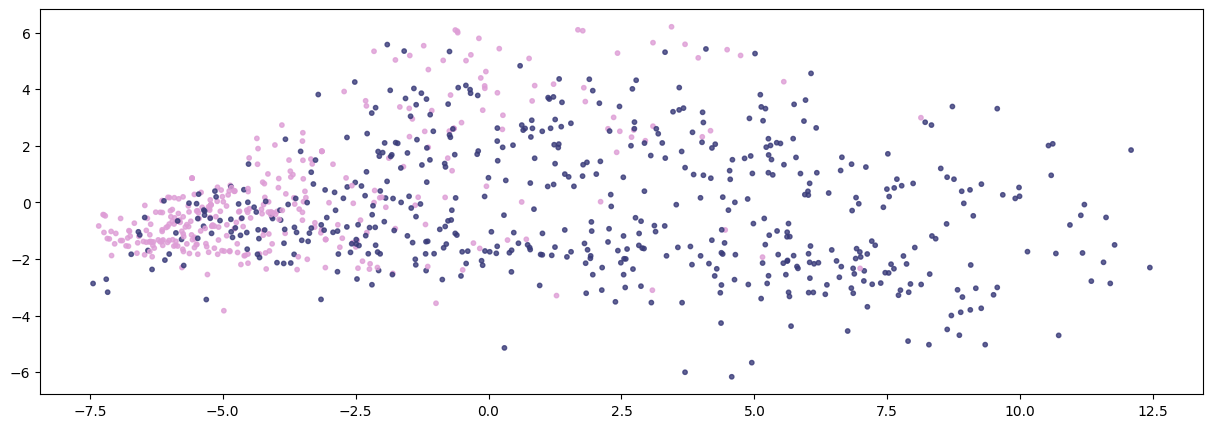

In [33]:

# plot first two PC without labels
plt.scatter(X[:, 0], X[:, 1], c=label, alpha=.8, s=10, cmap='tab20b')

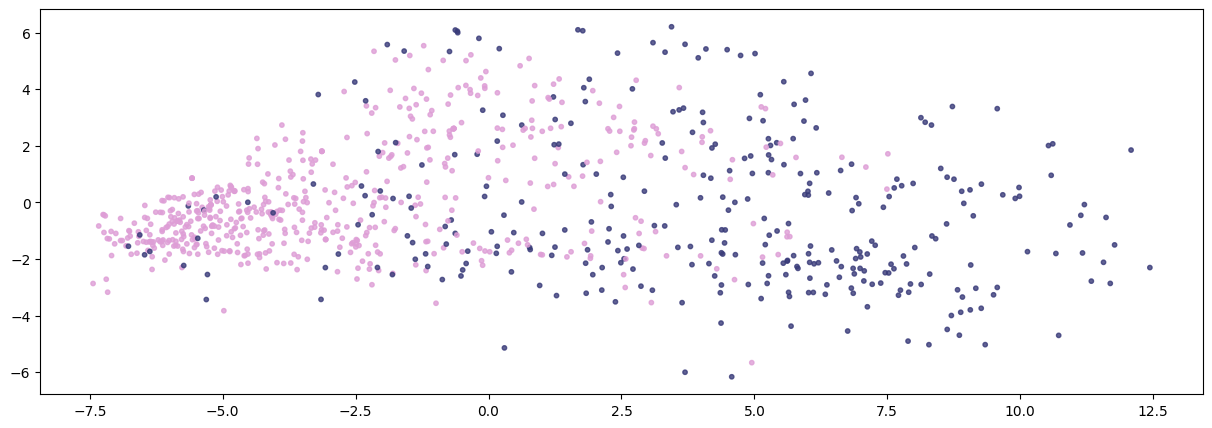

In [37]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, alpha=0.8, cmap='tab20b')

In [36]:

mostrar_resultados(label, labels)  

NameError: name 'mostrar_resultados' is not defined

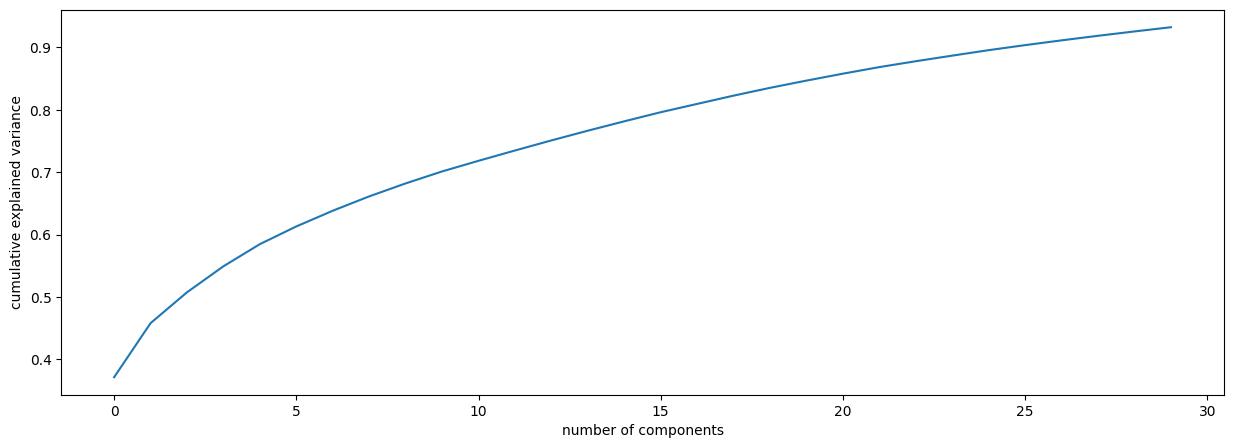

In [65]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Balance of the dataset.

In [25]:
for lab in np.unique(y_tr):
    n_sam = np.sum(y_tr == lab)
    print("Class %d: %3d samples (%5.2f%%)" % (lab, n_sam, 100.0 * n_sam / len(y_tr)))

Class 0: 475 samples (61.69%)
Class 1: 295 samples (38.31%)


In [26]:
for lab in np.unique(y_te):
    n_sam = np.sum(y_te == lab)
    print("Class %d: %3d samples (%5.2f%%)" % (lab, n_sam, 100.0 * n_sam / len(y_te)))

Class 0:  58 samples (49.15%)
Class 1:  60 samples (50.85%)


# Experiments

## Experiment 1: Regresion Logística

In [2]:
LR = LogisticRegression(class_weight="balanced")
#The pipeline is created.
pipeline = Pipeline([("LR", LR)])

gs1 = GridSearchCV(pipeline, cv=5,
                  param_grid={"LR__l1_ratio": np.logspace(-10, 10, 10),
                              "LR__C": np.logspace(-100, 100, 10),
                              "LR__fit_intercept": [True, False]})

gs1.fit(X_tr, y_tr)



NameError: name 'LogisticRegression' is not defined

In [ ]:
y_pred = gs1.predict(X_te)
gs1.best_params_

LR con FS en RF


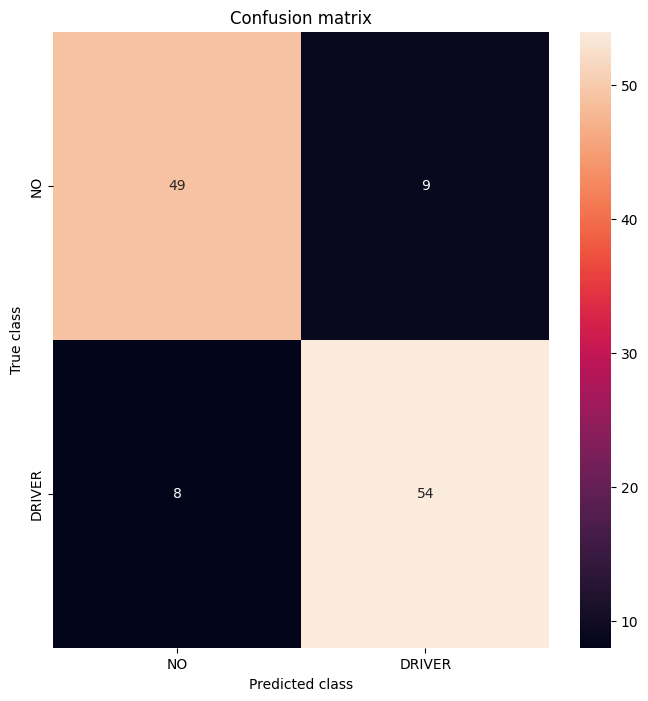

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        58
         1.0       0.86      0.87      0.86        62

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120

                 Acc  Bal. Acc
     Train      0.89      0.90
      Test      0.86      0.86


[[0.8877654196157735, 0.8951360340173262],
 [0.8583333333333333, 0.8578976640711902]]

In [70]:
print('LR con FS en RF')
LABELS = ["NO", "DRIVER"]
mostrar_resultados(y_te, y_pred)
evaluate_model(gs1, X_tr, y_tr, X_te, y_te, print_table=True)

## Experiment 2: Evaluación de hyperparámetros con lasso ridge y elasticnet

In [79]:
alpha_vec = np.logspace(-10, 10)

gs_en = GridSearchCV(ElasticNet(max_iter=5000), cv=5,
                  param_grid={"alpha": alpha_vec, "l1_ratio": [0, 0.05, 0.5, 0.95, 1.0]})
gs_en.fit(X_tr, y_tr)

print("Best Regularization Parameter ElasticN: %.2g" % gs_en.best_params_["alpha"])
print("Best Mixture Parameter ElasticN: %.2g" % gs_en.best_params_["l1_ratio"])

gs_la = GridSearchCV(Lasso(max_iter=5000), cv=5, param_grid={"alpha": alpha_vec})
gs_la.fit(X_tr, y_tr)
print("Best Parameter Lasso: %.2g" % gs_la.best_params_["alpha"])

gs_rr = GridSearchCV(Ridge(), cv=5, param_grid={"alpha": alpha_vec})
gs_rr.fit(X_tr, y_tr)
print("Best Parameter Ridge: %.2g" % gs_rr.best_params_["alpha"])

Best Regularization Parameter ElasticN: 0.0091
Best Mixture Parameter ElasticN: 1


In [21]:
#evaluate_model(gs_en, X_tr, y_tr, X_te, y_te, print_table=True)
print("Ridge Regression: %.4f" % gs_rr.score(X_te, y_te))
print("Lasso:            %.4f" % gs_la.score(X_te, y_te))
print("Elastic-Net:      %.4f" % gs_en.score(X_te, y_te))

Ridge Regression: 0.5444
Lasso:            0.5172
Elastic-Net:      0.5172


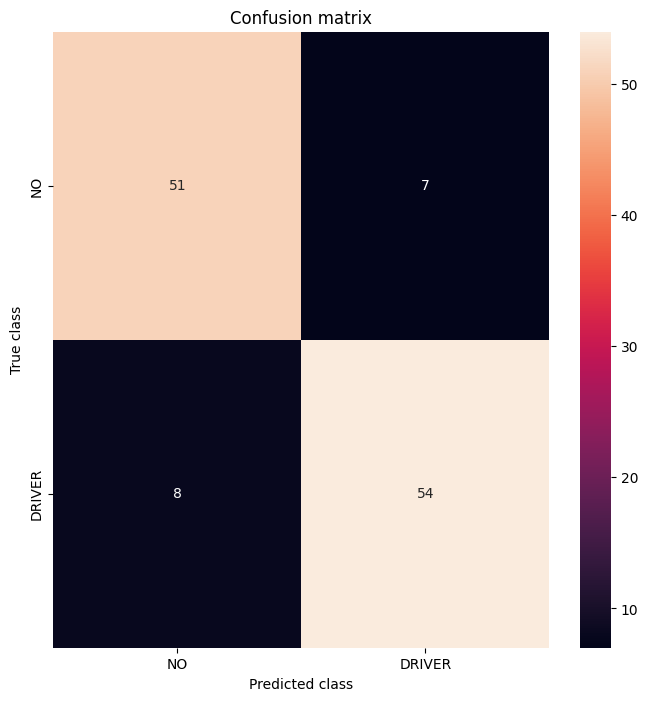

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87        58
         1.0       0.89      0.87      0.88        62

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.87       120
weighted avg       0.88      0.88      0.88       120



In [85]:
y_p = gs_en.predict(X_te)
y_p2 = []
for value in y_p:
    if value>0.5:
        y_p2.append(1)
    else:
        y_p2.append(0)
mostrar_resultados(y_te, y_p2)     

## Experiment 3: SVC

In [71]:
#SVC

SVCM = SVC()


SVC 


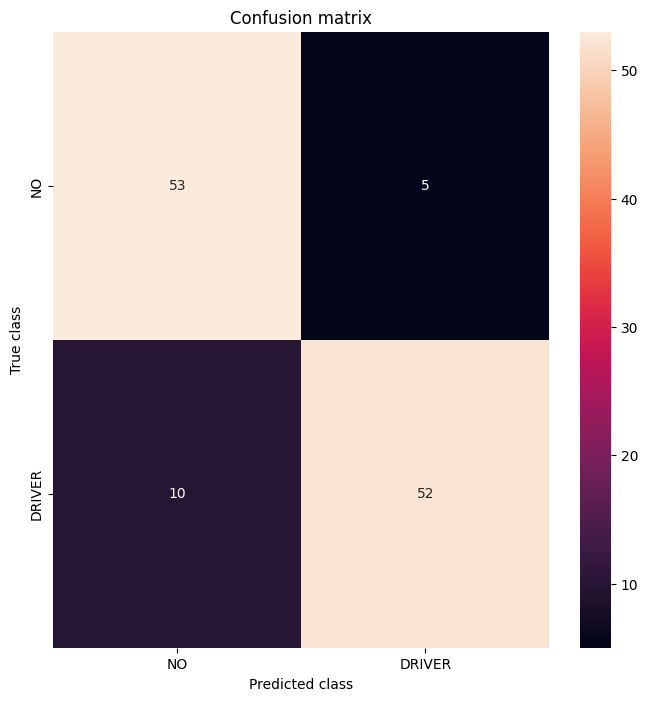

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88        58
         1.0       0.91      0.84      0.87        62

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120

                 Acc  Bal. Acc
     Train      0.93      0.92
      Test      0.88      0.88


[[0.9292214357937311, 0.9248350300827496], [0.875, 0.8762513904338154]]

In [72]:

pipelineSVC = Pipeline([("SVCM", SVCM)])

gsSVC1 = GridSearchCV(pipelineSVC, cv=5,
                  param_grid={"SVCM__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]})

gsSVC1.fit(X_tr, y_tr)
y_pred = gsSVC1.predict(X_te)
print('SVC ')
mostrar_resultados(y_te, y_pred)
evaluate_model(gsSVC1, X_tr, y_tr, X_te, y_te, print_table=True)

## Experiment 4: Random Forest

In [73]:
RF = RandomForestClassifier( class_weight='balanced')


#The pipeline is created.
pipelineRF = Pipeline([("RF", RF)])

gsRF1 = GridSearchCV(pipelineRF, cv=5,
                  param_grid={"RF__ccp_alpha": np.logspace(-5, 5),
                             "RF__max_depth": [5, 10, 15],
                             "RF__n_estimators": [100, 150, 200]})

gsRF1.fit(X_tr, y_tr)
y_pred = gsRF1.predict(X_te)
print('RF')


RF


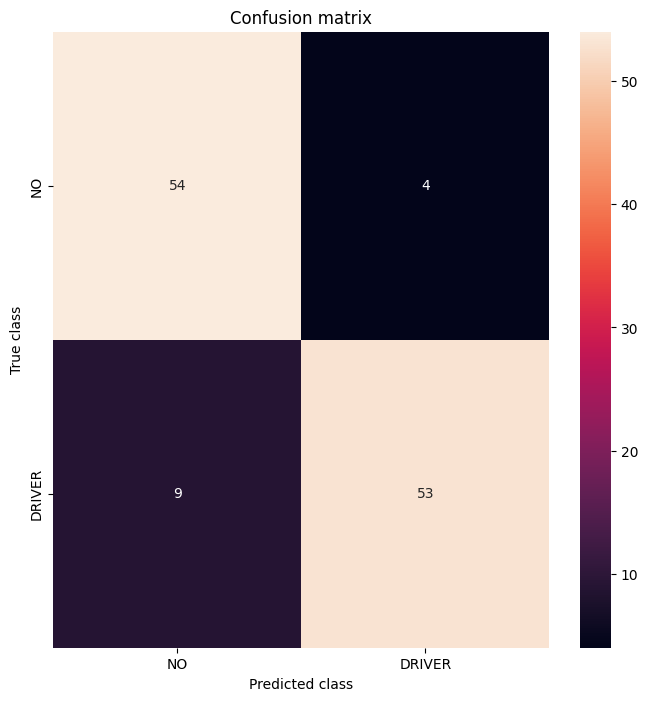

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89        58
         1.0       0.93      0.85      0.89        62

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120

                 Acc  Bal. Acc
     Train      0.99      0.99
      Test      0.89      0.89


{'RF__ccp_alpha': 1.5998587196060572e-05,
 'RF__max_depth': 10,
 'RF__n_estimators': 150}

In [74]:
LABELS = ["NO", "DRIVER"]
mostrar_resultados(y_te, y_pred)
evaluate_model(gsRF1, X_tr, y_tr, X_te, y_te, print_table=True)
gsRF1.best_params_

## Experiment 5: Neuronal Network

NN con FS en RF


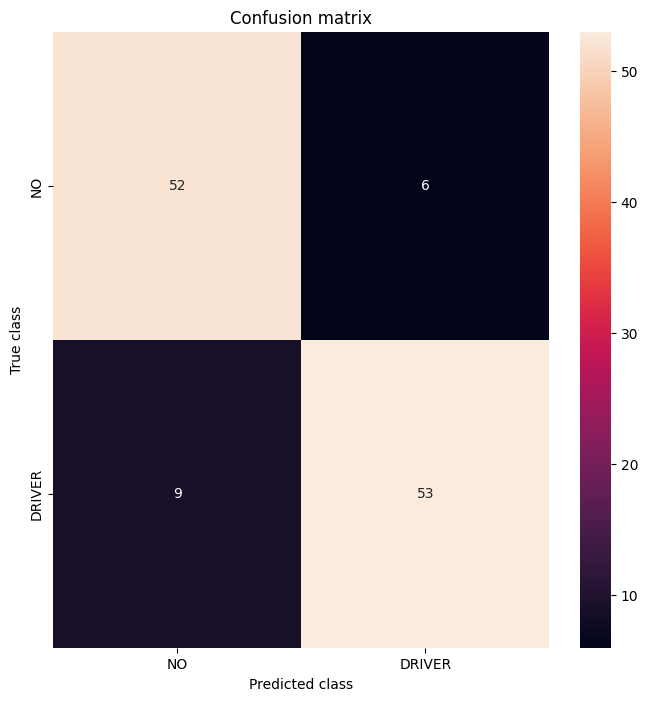

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87        58
         1.0       0.90      0.85      0.88        62

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.88       120

                 Acc  Bal. Acc
     Train      0.97      0.97
      Test      0.88      0.88


{'NN__alpha': 3.2374575428176464}

In [75]:
nn = MLPClassifier(solver='adam', hidden_layer_sizes=(150, 15))

#The pipeline is created.
pipelineNN = Pipeline([("NN", nn)])

gsNN1 = GridSearchCV(pipelineNN, cv=5,
                  param_grid={"NN__alpha": np.logspace(-5, 5)})

gsNN1.fit(X_tr, y_tr)
y_pred = gsNN1.predict(X_te)
print('NN con FS en RF')
mostrar_resultados(y_te, y_pred)
evaluate_model(gsNN1, X_tr, y_tr, X_te, y_te, print_table=True)
gsNN1.best_params_

NN con FS en RF


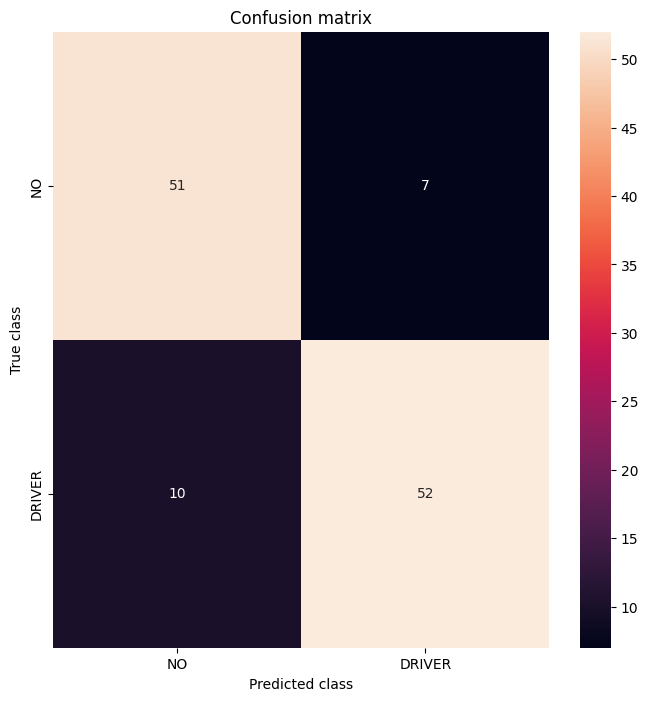

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        58
         1.0       0.88      0.84      0.86        62

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120

                 Acc  Bal. Acc
     Train      0.93      0.93
      Test      0.86      0.86


{'NN__alpha': 0.0006866488450042998,
 'NN__hidden_layer_sizes': (200, 10),
 'NN__solver': 'sgd'}

In [76]:
nn = MLPClassifier()

#The pipeline is created.
pipelineNN = Pipeline([("NN", nn)])

gsNN2 = GridSearchCV(pipelineNN, cv=5,
                  param_grid={"NN__alpha": np.logspace(-5, 5),
                             "NN__solver":['lbfgs', 'sgd', 'adam'],
                             "NN__hidden_layer_sizes": [(200, 10), (150, 10), (150, 15), (200,15)]})

gsNN2.fit(X_tr, y_tr)
y_pred = gsNN2.predict(X_te)
print('NN con FS en RF')
mostrar_resultados(y_te, y_pred)
evaluate_model(gsNN2, X_tr, y_tr, X_te, y_te, print_table=True)
gsNN2.best_params_

NN con FS en RF


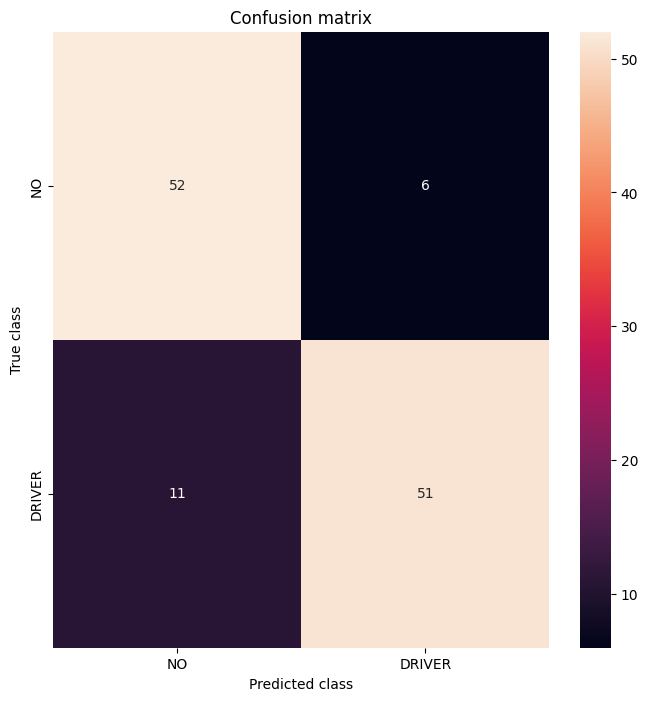

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86        58
         1.0       0.89      0.82      0.86        62

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120

                 Acc  Bal. Acc
     Train      0.91      0.90
      Test      0.86      0.86


{'NN__alpha': 0.7906043210907702,
 'NN__hidden_layer_sizes': (200, 10),
 'NN__solver': 'sgd'}

In [77]:
nn = MLPClassifier()

#The pipeline is created.
pipelineNN = Pipeline([("NN", nn)])

gsNN3 = GridSearchCV(pipelineNN, cv=5,
                  param_grid={"NN__alpha": np.logspace(-5, 5),
                             "NN__solver":['sgd'],
                             "NN__hidden_layer_sizes": [(200, 10)]})

gsNN3.fit(X_tr, y_tr)
y_pred = gsNN3.predict(X_te)
print('NN con FS en RF')
mostrar_resultados(y_te, y_pred)
evaluate_model(gsNN3, X_tr, y_tr, X_te, y_te, print_table=True)
gsNN3.best_params_

## Experiment 6: 

In [86]:
df_5 = scaler.fit_transform(df_3[numeric_columns])

X_1 = pca.transform(df_5)

y_1 = list(df_3['DRIVER'])



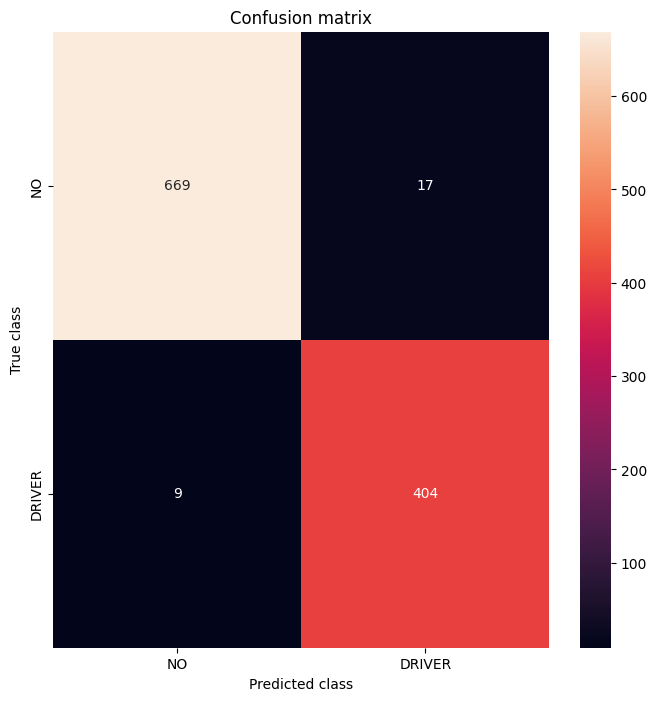

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       686
         1.0       0.96      0.98      0.97       413

    accuracy                           0.98      1099
   macro avg       0.97      0.98      0.97      1099
weighted avg       0.98      0.98      0.98      1099



In [87]:
y_pred = gsRF1.predict(X_1)
mostrar_resultados(y_1, y_pred)

In [88]:
import operator
y_pred = list(map(bool,y_pred))
ny_pred = list(map(operator.not_, y_pred))
y_11 = list(map(bool, y_1))
df_8 = df_3.iloc[ny_pred]
df_9 = df_3.iloc[y_11]
intersection_arr = np.intersect1d(df_8['variantInternalId'], df_9['variantInternalId'])

df_10 = df_8.loc[df_8['variantInternalId'].isin(intersection_arr),:]
intersection_arr = np.intersect1d(df_10['variantInternalId'], df_1['variantInternalId'])

df_10 = df_1.loc[df_1['variantInternalId'].isin(intersection_arr),:]
df_10.to_csv('FN_Drivers_NN2_FS_ANOVA_Treated_like_Artifacts.csv', header=True, index=True)

ny_pred = list(map(operator.not_, ny_pred))
y_11 = list(map(operator.not_, y_11))
df_8 = df_3.iloc[ny_pred]
df_9 = df_3.iloc[y_11]
intersection_arr = np.intersect1d(df_8['variantInternalId'], df_9['variantInternalId'])

df_11 = df_8.loc[df_8['variantInternalId'].isin(intersection_arr),:]

intersection_arr = np.intersect1d(df_1['variantInternalId'], df_11['variantInternalId'])

df_11 = df_1.loc[df_1['variantInternalId'].isin(intersection_arr),:]
df_11.to_csv('FP_Drivers_NN2_FS_ANOVA_Treated_like_Artifacts.csv', header=True, index=True)

In [37]:
"""y_pred = list(map(bool,y_pred))
df_8 = df_1.iloc[y_pred]

df_8 = df_8[df_8['COSMIC_N_MATCH'] != 0]
df_8['INTERNALLY_IDENTIFIED'] = df_8['INTERNALLY_IDENTIFIED'].fillna('NO')
df_8 = df_8[df_8['INTERNALLY_IDENTIFIED'] == 'NO']
df_8 = df_8[df_8['ARTIFACTS'] == False]
df_8.to_csv('new_drivers_4.csv', header=True, index=True)"""

"y_pred = list(map(bool,y_pred))\ndf_8 = df_1.iloc[y_pred]\n\ndf_8 = df_8[df_8['COSMIC_N_MATCH'] != 0]\ndf_8['INTERNALLY_IDENTIFIED'] = df_8['INTERNALLY_IDENTIFIED'].fillna('NO')\ndf_8 = df_8[df_8['INTERNALLY_IDENTIFIED'] == 'NO']\ndf_8 = df_8[df_8['ARTIFACTS'] == False]\ndf_8.to_csv('new_drivers_4.csv', header=True, index=True)"

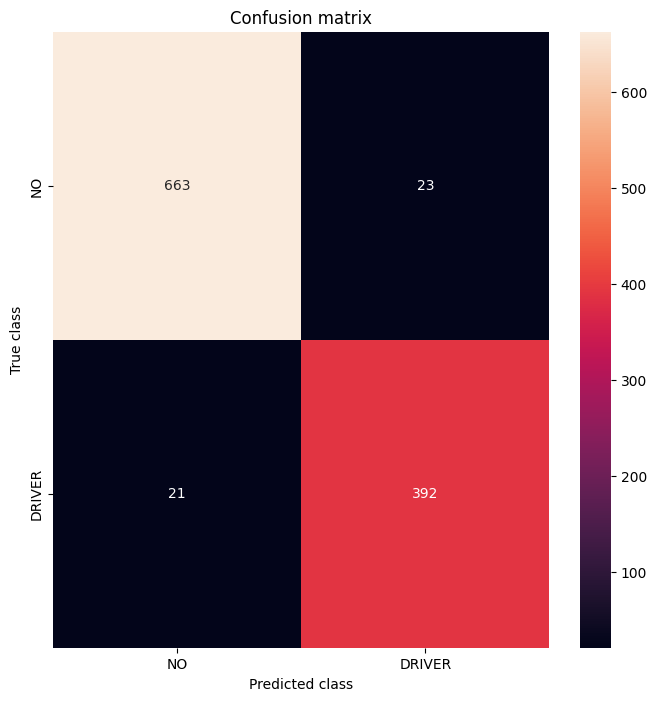

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       686
         1.0       0.94      0.95      0.95       413

    accuracy                           0.96      1099
   macro avg       0.96      0.96      0.96      1099
weighted avg       0.96      0.96      0.96      1099



In [89]:
y_pred = gsNN1.predict(X_1)
mostrar_resultados(y_1, y_pred)

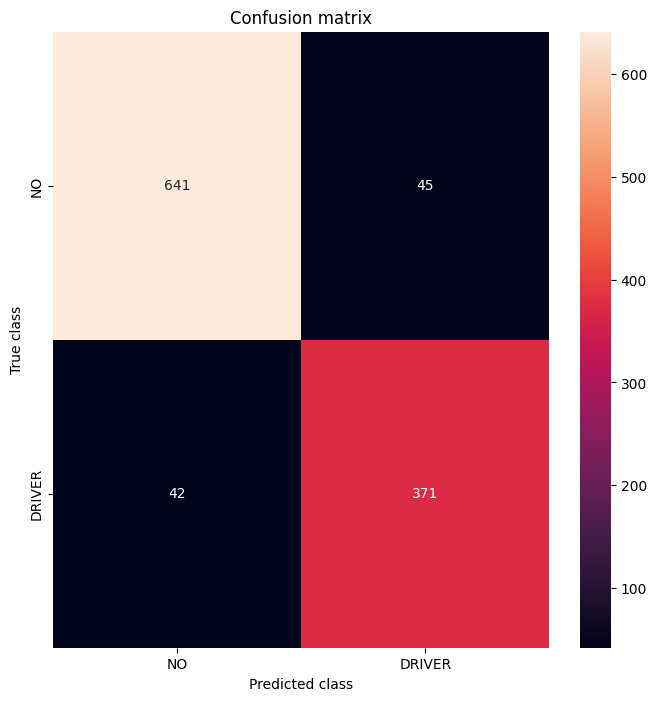

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       686
         1.0       0.89      0.90      0.90       413

    accuracy                           0.92      1099
   macro avg       0.92      0.92      0.92      1099
weighted avg       0.92      0.92      0.92      1099



In [90]:
y_pred = gsNN2.predict(X_1)
mostrar_resultados(y_1, y_pred)

In [91]:
import operator
y_pred = list(map(bool,y_pred))
ny_pred = list(map(operator.not_, y_pred))
y_11 = list(map(bool, y_1))
df_8 = df_3.iloc[ny_pred]
df_9 = df_3.iloc[y_11]
intersection_arr = np.intersect1d(df_8['variantInternalId'], df_9['variantInternalId'])

df_10 = df_8.loc[df_8['variantInternalId'].isin(intersection_arr),:]
intersection_arr = np.intersect1d(df_10['variantInternalId'], df_1['variantInternalId'])

df_10 = df_1.loc[df_1['variantInternalId'].isin(intersection_arr),:]
df_10.to_csv('FN_Drivers_NN2_FS_ANOVA.csv', header=True, index=True)

ny_pred = list(map(operator.not_, ny_pred))
y_11 = list(map(operator.not_, y_11))
df_8 = df_3.iloc[ny_pred]
df_9 = df_3.iloc[y_11]
intersection_arr = np.intersect1d(df_8['variantInternalId'], df_9['variantInternalId'])

df_11 = df_8.loc[df_8['variantInternalId'].isin(intersection_arr),:]

intersection_arr = np.intersect1d(df_1['variantInternalId'], df_11['variantInternalId'])

df_11 = df_1.loc[df_1['variantInternalId'].isin(intersection_arr),:]
df_11.to_csv('FP_Drivers_NN2_FS_ANOVA.csv', header=True, index=True)

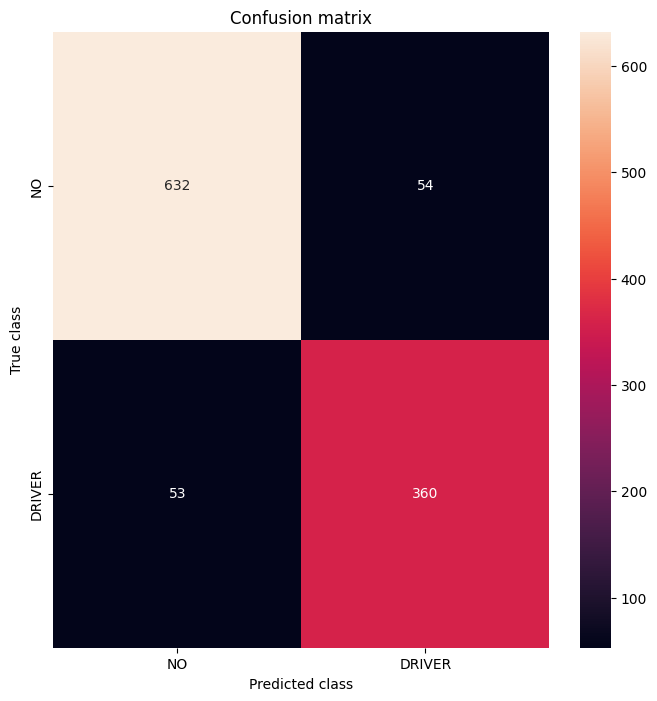

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       686
         1.0       0.87      0.87      0.87       413

    accuracy                           0.90      1099
   macro avg       0.90      0.90      0.90      1099
weighted avg       0.90      0.90      0.90      1099



In [92]:
y_pred = gsNN3.predict(X_1)
mostrar_resultados(y_1, y_pred)

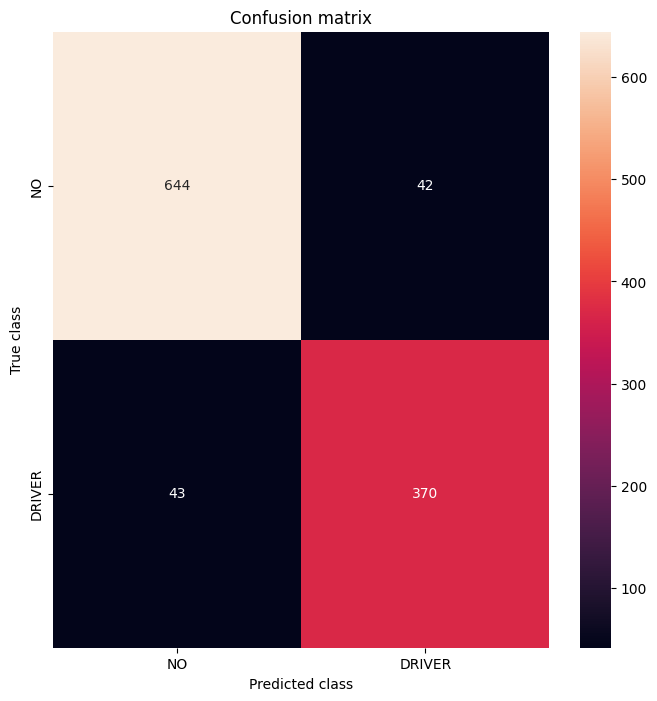

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       686
         1.0       0.90      0.90      0.90       413

    accuracy                           0.92      1099
   macro avg       0.92      0.92      0.92      1099
weighted avg       0.92      0.92      0.92      1099



In [93]:
y_pred = gsSVC1.predict(X_1)
mostrar_resultados(y_1, y_pred)

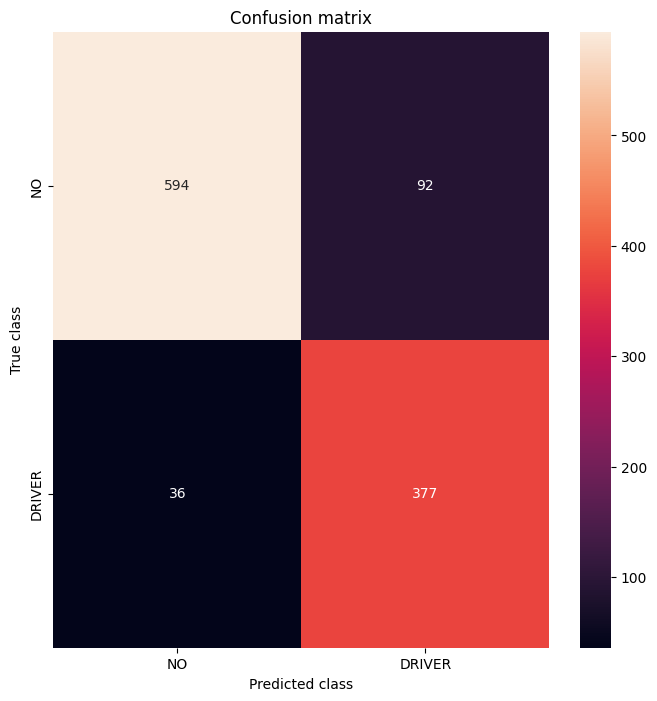

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90       686
         1.0       0.80      0.91      0.85       413

    accuracy                           0.88      1099
   macro avg       0.87      0.89      0.88      1099
weighted avg       0.89      0.88      0.88      1099



In [94]:
y_pred = gs1.predict(X_1)
mostrar_resultados(y_1, y_pred)

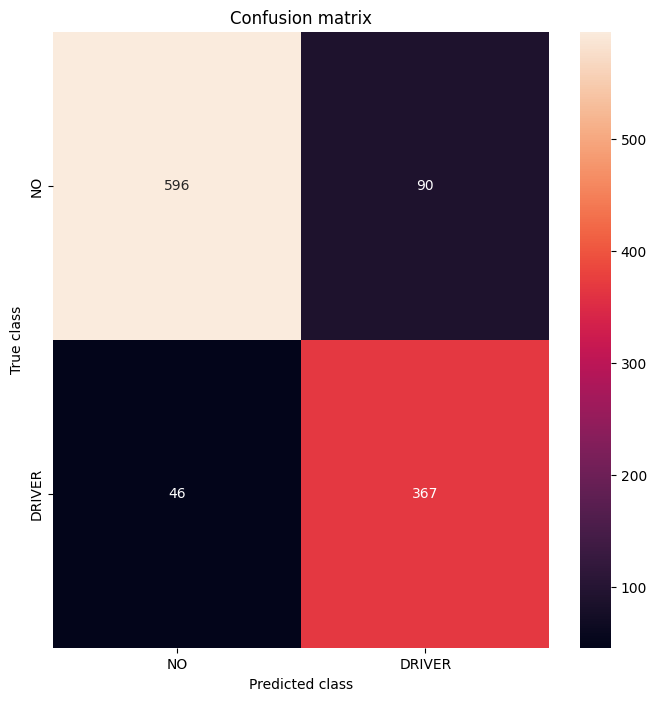

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       686
         1.0       0.80      0.89      0.84       413

    accuracy                           0.88      1099
   macro avg       0.87      0.88      0.87      1099
weighted avg       0.88      0.88      0.88      1099



In [95]:
y_p = gs_en.predict(X_1)
y_p2 = []
for value in y_p:
    if value>0.5:
        y_p2.append(1)
    else:
        y_p2.append(0)
